In [1]:
#Installing libraries
!pip install "chart_studio"

Loading all the libraries required to implement the models

In [2]:
# Basic libraries for data manipulation and analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Libraries for plotting data
import plotly.tools as tls
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

import cufflinks as cf
# print(cf.__version__)

# Decision Tree based Regression Models
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
#To mount the google drive with this notebook so that it can access the CSV file that is dataset from the drive and run it efficiently
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
 # Importing dataset

Bfdata = pd.read_csv('gdrive/My Drive/BlackFridayDataset.csv')

In [5]:
%matplotlib inline

In [6]:
# to check for null values present, if any
Bfdata.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
# Replace missing values in Product_Category_2 and Product_Category_3 columns with 0
# because replacing these missing values with mean/median/mode might introduce bias in the data
Bfdata['Product_Category_2'].fillna(0, inplace=True)
Bfdata['Product_Category_3'].fillna(0, inplace=True)

In [8]:
# Converting Product_Category_2 and Product_Category_3 to int from object, to maintain consistency across the dataframe
Bfdata['Product_Category_2'] = Bfdata['Product_Category_2'].astype(int)
Bfdata['Product_Category_3'] = Bfdata['Product_Category_3'].astype(int)

In [9]:
# a copy of the oroginal dataframe
bfdata  = Bfdata.copy(deep=True)

In [10]:
# Replacing column values in the dataframe to maintain consistency throughout

# In Gender, replacing 'F' with 0 and 'M' with 1
bfdata.loc[bfdata['Gender'] == 'F', 'Gender'] = 0
bfdata.loc[bfdata['Gender'] == 'M', 'Gender'] = 1

# In Age column, replacing different ranges with the below values
# '0-17' is replaced with 17
# '18-25' is replaced with 25
# '26-35' is replaced with 35
# '36-45' is replaced with 45
# '46-50' is replaced with 50
# '51-55' is replaced with 55
# '55+' is replaced with 58
bfdata.loc[bfdata['Age'] == '0-17', 'Age'] = 17
bfdata.loc[bfdata['Age'] == '18-25', 'Age'] = 25
#bfdata.loc[bfdata['Age'] == '18-2', 'Age'] = 25
bfdata.loc[bfdata['Age'] == '26-35', 'Age'] = 35
bfdata.loc[bfdata['Age'] == '36-45', 'Age'] = 45
bfdata.loc[bfdata['Age'] == '46-50', 'Age'] = 50
bfdata.loc[bfdata['Age'] == '51-55', 'Age'] = 55
bfdata.loc[bfdata['Age'] == '55+', 'Age'] = 58



In [11]:
#To check all the values in the Age column 
bfdata.Age.unique()

array([17, 58, 35, 50, 55, 45, 25], dtype=object)

In [12]:
#To checck NULL values from the dataframe
bfdata.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:

# In 'Stay_In_Current_City_Years', replacing '4+' with 4
bfdata.loc[bfdata['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

# In 'City_Category',replacing different categories with the values listed below;
# 'A' is replaced with 0
# 'B' is replaced with 1
# 'C' is replaced with 2
bfdata.loc[bfdata['City_Category'] == 'A', 'City_Category'] = 0
bfdata.loc[bfdata['City_Category'] == 'B', 'City_Category'] = 1
bfdata.loc[bfdata['City_Category'] == 'C', 'City_Category'] = 2

# Converting all object type columns to integer to maintain consistency across the dataframe
bfdata['Gender'] = bfdata['Gender'].astype(int)
bfdata['Age'] = pd.to_numeric(bfdata.Age)

bfdata['City_Category'] = bfdata['City_Category'].astype(int)
bfdata['Stay_In_Current_City_Years'] = bfdata['Stay_In_Current_City_Years'].astype(int)


In [14]:
#To display the 5 rows from the dataframe
bfdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,17,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,17,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,17,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,17,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,58,16,2,4,0,8,0,0,7969


In [15]:
# Now, we can see that there are no null values
bfdata.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [16]:
#To check the correlation among different parameters in the dataframe
bfdata.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031898,0.042706,-0.023024,0.024107,-0.030655,0.018732,0.003687,0.003663,0.003938,0.005389
Gender,-0.031898,1.000000,-0.002849,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.001580,0.035813,0.060086
Age,0.042706,-0.002849,1.000000,0.097696,0.105707,-0.001741,0.310924,0.061229,0.020640,-0.006015,0.018064
Occupation,-0.023024,0.117294,0.097696,1.000000,0.033781,0.031203,0.024691,-0.008114,0.006792,0.011941,0.021104
City_Category,0.024107,-0.004129,0.105707,0.033781,1.000000,0.019948,0.040173,-0.027444,0.019535,0.037751,0.068507
Stay_In_Current_City_Years,-0.030655,0.015392,-0.001741,0.031203,0.019948,1.000000,-0.012663,-0.004182,0.001244,0.001992,0.005470
Marital_Status,0.018732,-0.010379,0.310924,0.024691,0.040173,-0.012663,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.045661,0.061229,-0.008114,-0.027444,-0.004182,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,-0.001580,0.020640,0.006792,0.019535,0.001244,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.035813,-0.006015,0.011941,0.037751,0.001992,-0.004363,-0.389048,0.090284,1.000000,0.284120


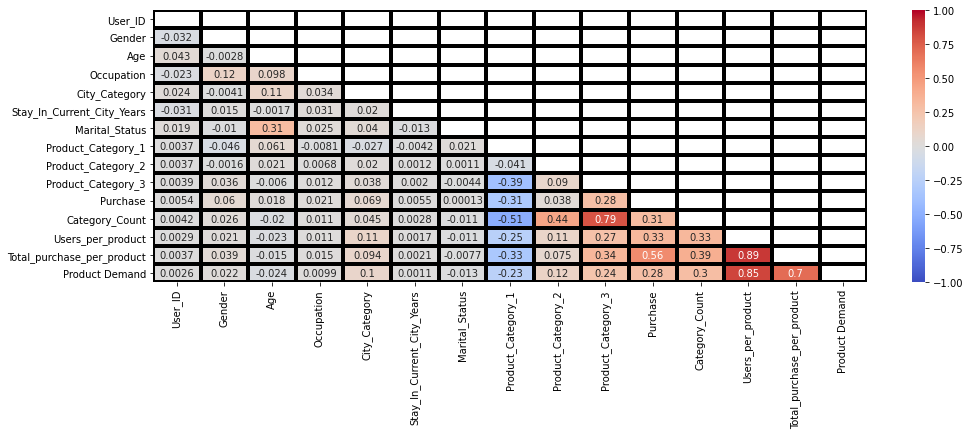

In [52]:
#To plot correaltion matrxix from the dataset
plt.figure(figsize = (16,5))
matrix = np.triu(bfdata.corr())
sns.heatmap(bfdata.corr(), annot=True, mask=matrix , vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [18]:
# Creating a Pairplot for all features for better understanding of relation between the variables
#plt.style.use('default')
#sns.pairplot(train)
#plt.show()

In [19]:
bfdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,17,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,17,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,17,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,17,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,58,16,2,4,0,8,0,0,7969


In [20]:
#Category Cout

conditions = [
    (bfdata['Product_Category_1'] != 0) & (bfdata['Product_Category_2'] == 0) & (bfdata['Product_Category_3'] == 0),
    (bfdata['Product_Category_1'] != 0) & (bfdata['Product_Category_2'] != 0) & (bfdata['Product_Category_3'] == 0),
    (bfdata['Product_Category_1'] != 0) & (bfdata['Product_Category_2'] != 0) & (bfdata['Product_Category_3'] != 0)]
choices = [1, 2, 3]
bfdata['Category_Count'] = np.select(conditions, choices, default=0)

In [21]:
#No of users per product

In [22]:


bfdata[bfdata.User_ID == 'Users_Per_product'].groupby(['Product_ID']).count()



required_product_data = bfdata[['Product_ID']]

required_product_data['Users_per_product'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,Product_ID,Users_per_product
0,P00000142,1130
1,P00000242,371
2,P00000342,238
3,P00000442,92
4,P00000542,146


In [23]:
#Merging two dataframes together
bfdata = pd.merge(bfdata, grouped_product_data, how='inner', on = 'Product_ID')

In [24]:
#Calculating Purchase per product
purchase_data = bfdata.groupby('Product_ID')['Purchase'].agg(['sum'])


In [25]:
#Merging two dataframes together
bfdata = pd.merge(bfdata, purchase_data, how='inner', on = 'Product_ID')

In [26]:
bfdata = bfdata.rename({'sum':'Total_purchase_per_product'},axis=1)

In [27]:
#Product Demand
# 'Low' is replaced with 0
# 'Med' is replaced with 1
# 'High' is replaced with 2


bin_labels_3 = ['0', '1', '2']
bfdata['Product Demand'] = pd.qcut(bfdata['Users_per_product'],
                              q=[0, .25, .75, 1],
                              labels=bin_labels_3)



In [28]:
bfdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Users_per_product,Total_purchase_per_product,Product Demand
0,1000001,P00069042,0,17,10,0,2,0,3,0,0,8370,1,221,2621891,1
1,1000149,P00069042,1,35,1,1,2,1,3,0,0,10715,1,221,2621891,1
2,1000541,P00069042,0,25,4,2,3,0,3,0,0,11037,1,221,2621891,1
3,1000698,P00069042,1,25,4,0,1,0,3,0,0,8009,1,221,2621891,1
4,1000951,P00069042,1,50,2,1,4,1,3,0,0,13346,1,221,2621891,1


In [29]:
bfdata.count()

User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            537577
Product_Category_3            537577
Purchase                      537577
Category_Count                537577
Users_per_product             537577
Total_purchase_per_product    537577
Product Demand                537577
dtype: int64

In [30]:
#To convert the categorial data to numeric data in Product Demand
bfdata['Product Demand'] = pd.to_numeric(bfdata['Product Demand'])

In [31]:
#Splitting the dataset in Training and Testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(bfdata, test_size=0.3)

In [32]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Users_per_product,Total_purchase_per_product,Product Demand
51735,1001447,P00021742,1,25,4,0,0,0,5,0,0,6990,1,762,5322085,2
427411,1000335,P00010942,1,45,18,2,0,1,1,2,6,3932,3,303,4042695,1
180800,1005704,P00001742,0,25,4,1,3,0,8,14,0,8059,2,449,3585330,1
96260,1003313,P00142142,1,45,20,0,2,0,1,2,15,12092,3,702,8293846,2
423919,1005523,P00212042,1,45,0,1,2,1,13,15,0,567,2,224,147633,1


In [33]:
X = train.drop(['Purchase','Product_ID'], axis=1)
Y = train['Purchase']


In [34]:
x_test = test.drop(['Product_ID'], axis=1)
x_test = test.iloc[:,1:]

Feature Selection



In [35]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [36]:
selector.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [37]:
feature_imp = selector.feature_importances_

In [38]:
print(feature_imp)

[0.07658611 0.0110553  0.03796789 0.05689287 0.02196444 0.04100276
 0.01520404 0.24204327 0.00999593 0.01311372 0.02222295 0.09522334
 0.30706511 0.04966229]


In [39]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))
    

0 7.66
1 1.11
2 3.8
3 5.69
4 2.2
5 4.1
6 1.52
7 24.2
8 1.0
9 1.31
10 2.22
11 9.52
12 30.71
13 4.97


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376303 entries, 175439 to 511103
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     376303 non-null  int64
 1   Gender                      376303 non-null  int64
 2   Age                         376303 non-null  int64
 3   Occupation                  376303 non-null  int64
 4   City_Category               376303 non-null  int64
 5   Stay_In_Current_City_Years  376303 non-null  int64
 6   Marital_Status              376303 non-null  int64
 7   Product_Category_1          376303 non-null  int64
 8   Product_Category_2          376303 non-null  int64
 9   Product_Category_3          376303 non-null  int64
 10  Category_Count              376303 non-null  int64
 11  Users_per_product           376303 non-null  int64
 12  Total_purchase_per_product  376303 non-null  int64
 13  Product Demand              376303 non-

Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Splitting into Train and Test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (301042, 14)
X_test shape: (75261, 14)
Y_train shape: (301042,)
Y_test shape: (75261,)


Data Modelling

**Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
Y_pred_lin_reg = lin_reg.predict(X_test)

**KNN Regression**

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [48]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
Y_pred_knn = knn.predict(X_test)

**Decision Tree Regression**

In [50]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [51]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
Y_pred_dec = dec_tree.predict(X_test)

Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [54]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
Y_pred_ran_for = ran_for.predict(X_test)

****Random Forest Accuracy ****

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 2703.1085677304286
R2 score: 0.7052240734774626


**XGBoost Regression**

In [42]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [59]:
xgb.fit(X_train, Y_train)

[15:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
Y_pred_xgb = xgb.predict(X_test)

**Model Evaluation**

In [61]:
print("Linear Regression: ")
Lin_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg))
print("RMSE:",Lin_rmse)
Lin_score = r2_score(Y_test, Y_pred_lin_reg)
print("R2 score:", Lin_score )

Linear Regression: 
RMSE: 3587.5679565299097
R2 score: 0.480763387868279


In [62]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3017.2522404597908
R2 score: 0.6327276178441417


In [63]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3763.7560392467976
R2 score: 0.42851088131076986


In [64]:
print("Random forest regression: ")
Ran_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for))
print("RMSE:",Ran_rmse)
Ran_score = r2_score(Y_test, Y_pred_ran_for)
print("R2 score:", Ran_score)

Random forest regression: 
RMSE: 2703.1085677304286
R2 score: 0.7052240734774626


In [65]:
print("XGB regression: ")
XGB_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
print("RMSE:", XGB_rmse)
XGB_score = r2_score(Y_test, Y_pred_xgb)
print("R2 score:", XGB_score)

XGB regression: 
RMSE: 2748.2418479156886
R2 score: 0.6952982617609555


Comparison Graph

In [66]:
#Accuracy Score Comparison between Linear Regression, Random Forest and XGB

import pandas as pd

rmse=[Lin_rmse,Ran_rmse,XGB_rmse]

r2square=[Lin_score,Ran_score,XGB_score]

col={'RMSE':rmse,'R2_Square':r2square}
models=['Linear Regression','RDF','XGB']
dfm=pd.DataFrame(data=col,index=models)
dfm

,RMSE,R2_Square
Linear Regression,3587.567957,0.480763
RDF,2703.108568,0.705224
XGB,2748.241848,0.695298


Text(0, 0.5, 'Values')

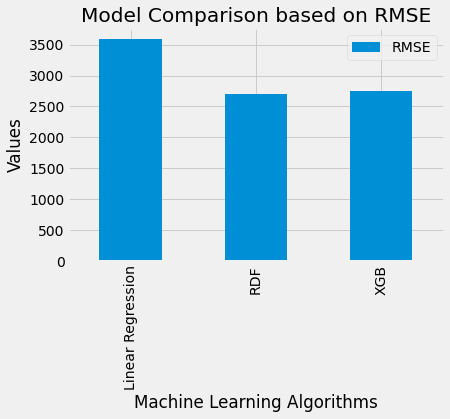

In [67]:
#PLotting the table using Bar Plot with respect to RMSE
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

plotdata = pd.DataFrame({
    "RMSE":[Lin_rmse,Ran_rmse,XGB_rmse],
    }, 
    index=['Linear Regression','RDF','XGB']
)
plotdata.plot(kind="bar")



#dfm.plot(kind='bar')
plt.title("Model Comparison based on RMSE")

plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Values")


Text(0, 0.5, 'Values')

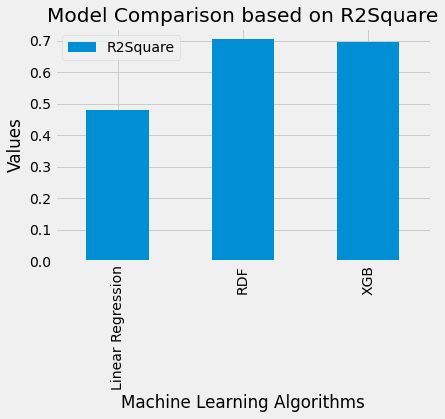

In [68]:
#PLotting the table using Bar Plot with respect to accuracy that is Rsquare
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

plotdata = pd.DataFrame({
    "R2Square":[Lin_score,Ran_score,XGB_score],
    }, 
    index=['Linear Regression','RDF','XGB']
)
plotdata.plot(kind="bar")



#dfm.plot(kind='bar')
plt.title("Model Comparison based on R2Square")

plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Values")


Feature Importance

In [43]:
#Baseline Model used for the comparison of the RFECV results

#Baseline Random Regression Model
rfe_base = RandomForestRegressor()

base_model = rfe_base.fit(X_train,Y_train)

base_model.score(X_test, Y_test)




0.7045248761392691

In [44]:
#Recursive Feature Engineering
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rfe_base, step=1)
rfe = rfe.fit(X_train, Y_train)

In [45]:
#This feature selection is used to select best feature with respect to Linear Regression.
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,User_ID,1
2,Age,1
3,Occupation,1
5,Stay_In_Current_City_Years,1
7,Product_Category_1,1
11,Users_per_product,1
12,Total_purchase_per_product,1
4,City_Category,2
8,Product_Category_2,3
6,Marital_Status,4


In [47]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [48]:
lin_reg.fit(X_train_rfe, Y_train)

Y_pred_lin_reg = lin_reg.predict(X_test_rfe)

print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 3638.225967046384
R2 score: 0.46754254471864554
